# Error Ellipse Analysis for Geodetic Stations
# ===========================================
# This script computes and visualizes the error ellipses for two geodetic stations (A and B)
# based on their covariance matrices. The ellipses represent the uncertainty in the stations'
# coordinates at a 95% confidence level. Stations C and D are fixed and used for reference.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from matplotlib.patches import Ellipse

# Step 1: Define Input Data
# -------------------------

In [2]:
# Coordinates of stations (in meters)
A = np.array([6276, 91543])  # Station A
B = np.array([7398, 88102])  # Station B
C = np.array([500, 90500])   # Station C (fixed)
D = np.array([2320, 87381])  # Station D (fixed)


In [3]:
# Covariance matrices (in m^2)
C_A = np.array([[0.001555, 0.001503],
                [0.001503, 0.003408]])  # Covariance for A
C_B = np.array([[0.000756, -0.000596],
                [-0.000596, 0.005132]])  # Covariance for B

# Scaling factor for 95% confidence ellipse (chi-squared distribution, 2 DOF)
k = np.sqrt(5.991)  # sqrt(chi^2_{2, 0.05}) ≈ 2.447
scale = 10000  # Convert meters to centimeters for plotting visibility
print(f"Scaling factor for 95% confidence: {k:.3f}")

Scaling factor for 95% confidence: 2.448


# Step 2: Compute Error Ellipse Parameters
# ---------------------------------------

In [4]:
def compute_error_ellipse(cov):
    """
    Compute the parameters of the error ellipse from a 2x2 covariance matrix.
    
    Parameters:
    cov (numpy.ndarray): 2x2 covariance matrix (in m^2).
    
    Returns:
    tuple: (a, b, theta) where a and b are semi-axes (in cm), theta is the orientation
           angle in degrees (from X-axis).
    """
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = eigh(cov)
    lambda_max, lambda_min = eigenvalues.max(), eigenvalues.min()
    
    # Semi-axes (scaled for 95% confidence and converted to cm)
    a = scale * k * np.sqrt(lambda_max)  # Semi-major axis
    b = scale * k * np.sqrt(lambda_min)  # Semi-minor axis
    
    # Orientation angle (from X-axis)
    sigma_x2, sigma_y2, sigma_xy = cov[0, 0], cov[1, 1], cov[0, 1]
    theta_rad = 0.5 * np.arctan2(2 * sigma_xy, sigma_x2 - sigma_y2)
    theta = np.degrees(theta_rad)
    
    # Area of the ellipse (in cm^2)
    area = np.pi * a * b
    
    # Rotation direction
    rotation_dir = "counterclockwise" if theta >= 0 else "clockwise"
    
    print(f"Semi-major axis: {a:.2f} cm, Semi-minor axis: {b:.2f} cm")
    print(f"Area: {area:.2f} cm²")
    print(f"Angle: {abs(theta):.2f}° ({rotation_dir})")
    
    return a, b, theta

# Step 3: Plot Error Ellipse
# --------------------------

In [5]:
def plot_error_ellipse(center, a, b, theta):
    """
    Plot an error ellipse centered at 'center' with semi-axes a, b, and angle theta.
    
    Parameters:
    center (numpy.ndarray): [x, y] coordinates of the ellipse center (in m).
    a, b (float): Semi-major and semi-minor axes (in cm).
    theta (float): Orientation angle in degrees.
    """
    ellipse = Ellipse(xy=center, width=a, height=b, angle=theta,
                     edgecolor='black', facecolor='none', alpha=0.9, lw=2)
    plt.gca().add_patch(ellipse)

# Step 4: Compute and Plot Ellipses
# --------------------------------


Error Ellipse for Station A:
Semi-major axis: 1595.13 cm, Semi-minor axis: 654.89 cm
Area: 3281835.20 cm²
Angle: 60.83° (counterclockwise)

Error Ellipse for Station B:
Semi-major axis: 1767.02 cm, Semi-minor axis: 636.52 cm
Area: 3533479.96 cm²
Angle: 82.38° (clockwise)


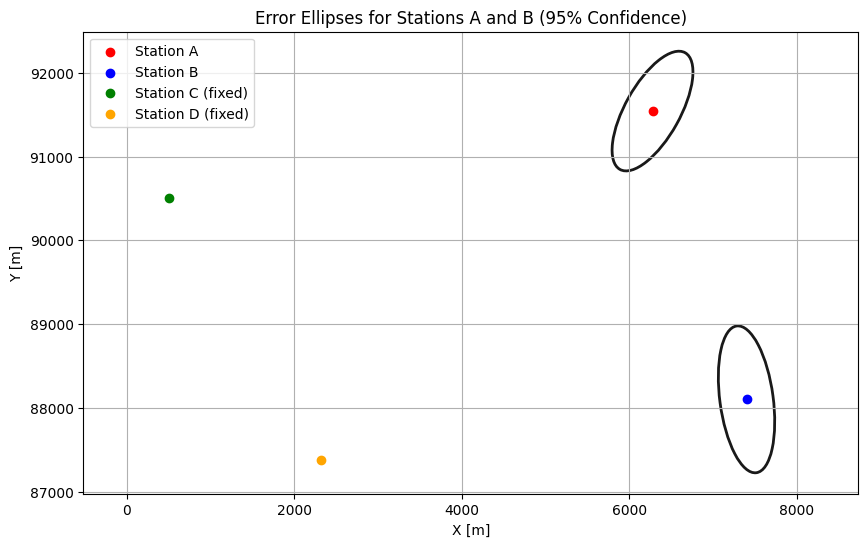

In [6]:
# Compute ellipse parameters for A and B
print("\nError Ellipse for Station A:")
a_A, b_A, theta_A = compute_error_ellipse(C_A)

print("\nError Ellipse for Station B:")
a_B, b_B, theta_B = compute_error_ellipse(C_B)

# Create the plot
plt.figure(figsize=(10, 6))
plt.scatter(A[0], A[1], color='red', label='Station A', zorder=5)
plt.scatter(B[0], B[1], color='blue', label='Station B', zorder=5)
plt.scatter(C[0], C[1], color='green', label='Station C (fixed)', zorder=5)
plt.scatter(D[0], D[1], color='orange', label='Station D (fixed)', zorder=5)

# Plot ellipses
plot_error_ellipse(A, a_A, b_A, theta_A)
plot_error_ellipse(B, a_B, b_B, theta_B)

# Customize plot
plt.xlabel("X [m]")
plt.ylabel("Y [m]")
plt.title("Error Ellipses for Stations A and B (95% Confidence)")
plt.axis('equal')  # Ensure ellipses are not distorted
plt.legend()
plt.grid(True)

# Save the plot
plt.savefig('error_ellipses.png')